# Experimento 1: _GridSearch_ no KNN

- Busca em grade para ```k``` variando de: $[1:9]$;
- Pensar em como mostrar acerto por frequência do motor;

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

## Busca em grade

In [2]:
fs13_df = pd.read_csv('./csvs/fs13.csv')
target_s = fs13_df.pop('target')

results = GridSearchCV(
    estimator=make_pipeline(StandardScaler(),
                            KNeighborsClassifier()),
    param_grid={'kneighborsclassifier__n_neighbors':np.arange(1, 10)},
    n_jobs=-1,
    cv=StratifiedKFold(n_splits=10, shuffle=True)
    ).fit(
        X=fs13_df.values,
        y=target_s.values
        ).cv_results_

results_df = pd.DataFrame(results)
results_df.to_csv('./csvs/02-gs_knn.csv')
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016131,0.008613,0.045531,0.016585,1,{'kneighborsclassifier__n_neighbors': 1},0.980769,0.976834,0.976834,0.988417,0.988417,0.988417,0.972973,0.980695,0.996139,0.972973,0.982247,0.007365,1
1,0.013796,0.004618,0.042347,0.009779,2,{'kneighborsclassifier__n_neighbors': 2},0.976923,0.972973,0.976834,0.988417,0.984556,0.988417,0.984556,0.976834,0.988417,0.976834,0.981476,0.005667,2
2,0.012350,0.007144,0.041233,0.015678,3,{'kneighborsclassifier__n_neighbors': 3},0.973077,0.965251,0.972973,0.992278,0.988417,0.984556,0.980695,0.980695,0.988417,0.976834,0.980319,0.007988,3
3,0.009960,0.003788,0.036341,0.011163,4,{'kneighborsclassifier__n_neighbors': 4},0.965385,0.961390,0.976834,0.984556,0.988417,0.980695,0.976834,0.976834,0.980695,0.965251,0.975689,0.008451,4
4,0.011035,0.004541,0.043454,0.014487,5,{'kneighborsclassifier__n_neighbors': 5},0.965385,0.961390,0.969112,0.988417,0.988417,0.984556,0.976834,0.976834,0.976834,0.969112,0.975689,0.008965,4
5,0.009553,0.001471,0.034778,0.003925,6,{'kneighborsclassifier__n_neighbors': 6},0.965385,0.961390,0.965251,0.980695,0.988417,0.984556,0.972973,0.976834,0.976834,0.965251,0.973759,0.008758,6
6,0.011448,0.004585,0.044208,0.016452,7,{'kneighborsclassifier__n_neighbors': 7},0.961538,0.957529,0.965251,0.976834,0.988417,0.980695,0.972973,0.972973,0.980695,0.961390,0.971830,0.009606,7
7,0.009738,0.002429,0.039647,0.005151,8,{'kneighborsclassifier__n_neighbors': 8},0.957692,0.957529,0.961390,0.972973,0.992278,0.965251,0.972973,0.965251,0.972973,0.953668,0.967198,0.010664,9
8,0.009386,0.003608,0.034118,0.007141,9,{'kneighborsclassifier__n_neighbors': 9},0.961538,0.953668,0.965251,0.972973,0.992278,0.969112,0.969112,0.965251,0.972973,0.953668,0.967582,0.010523,8


param_kneighborsclassifier__n_neighbors,mean_test_score,std_test_score,rank_test_score
1,0.982247,0.007365,1
2,0.981476,0.005667,2
3,0.980319,0.007988,3
4,0.975689,0.008451,4
5,0.975689,0.008965,4
6,0.973759,0.008758,6
7,0.971830,0.009606,7
8,0.967198,0.010664,9
9,0.967582,0.010523,8


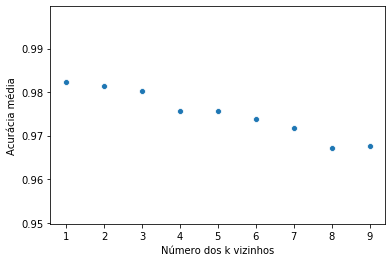

In [3]:
sns.scatterplot(
    data=results_df,
    x='param_kneighborsclassifier__n_neighbors',
    y='mean_test_score'
    ).set(
        xlabel='Número dos k vizinhos',
        ylabel='Acurácia média')

results_df[[
    'param_kneighborsclassifier__n_neighbors',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
    ]].style.hide_index()